In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
### Reading dataset
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

**Attribute Information**

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]



In [ ]:
print(df.ChestPainType.unique(),
      df.Sex.unique(),
      df.RestingECG.unique(),
      df.ExerciseAngina.unique(),
      df.ST_Slope.unique())

['ATA' 'NAP' 'ASY' 'TA'] ['M' 'F'] ['Normal' 'ST' 'LVH'] ['N' 'Y'] ['Up' 'Flat' 'Down']


In [ ]:
Total_columns = df.columns
Total_columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.shape

(918, 12)

In [ ]:
df.isnull()

Age    Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0    False  False          False      False        False      False   
1    False  False          False      False        False      False   
2    False  False          False      False        False      False   
3    False  False          False      False        False      False   
4    False  False          False      False        False      False   
..     ...    ...            ...        ...          ...        ...   
913  False  False          False      False        False      False   
914  False  False          False      False        False      False   
915  False  False          False      False        False      False   
916  False  False          False      False        False      False   
917  False  False          False      False        False      False   

     RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0         False  False           False    False     False         False  
1         False  False           False    False     False         False  
2         False  False           False    False     False         False  
3         False  False           False    False     False         False  
4         False  False           False    False     False         False  
..          ...    ...             ...      ...       ...           ...  
913       False  False           False    False     False         False  
914       False  False           False    False     False         False  
915       False  False           False    False     False         False  
916       False  False           False    False     False         False  
917       False  False           False    False     False         False  

[918 rows x 12 columns]

In [ ]:
# to find how many unique values object features have

for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

Age has 50 unique value
RestingBP has 67 unique value
Cholesterol has 222 unique value
FastingBS has 2 unique value
MaxHR has 119 unique value
Oldpeak has 53 unique value
HeartDisease has 2 unique value


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [ ]:
print( f"Skewness: {df['HeartDisease'].skew()}")

Skewness: -0.21508633825088655


In [ ]:
print( f"Kurtosis: {df['HeartDisease'].kurtosis()}")

Kurtosis: -1.9580084425329685


In [ ]:
#Splitting into Num features and Cat Features
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


Categorical Columns: Index([], dtype='object')


**Examination of Numerical Features**

In [ ]:
df[numerical].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

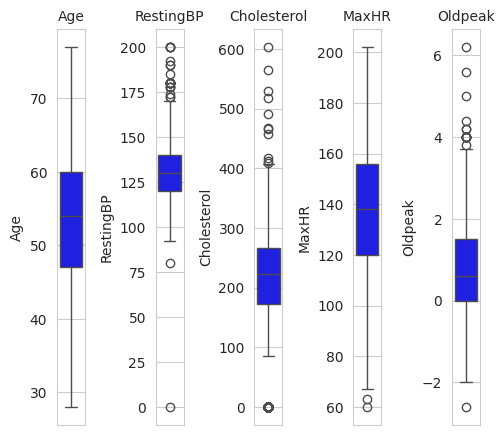

In [ ]:
columns_to_exclude = ['Sex','HeartDisease','ST_Slope','ChestPainType','FastingBS','RestingECG','ExerciseAngina']
l = [col for col in df.columns.values if col not in columns_to_exclude]

number_of_columns = 5
number_of_rows = len(l) - 1 // number_of_columns
plt.figure(figsize=(number_of_columns, 5 * number_of_rows))

for i in range(0, len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]], color='blue', orient='v')
    plt.title(l[i], fontsize=10)
    plt.tight_layout()


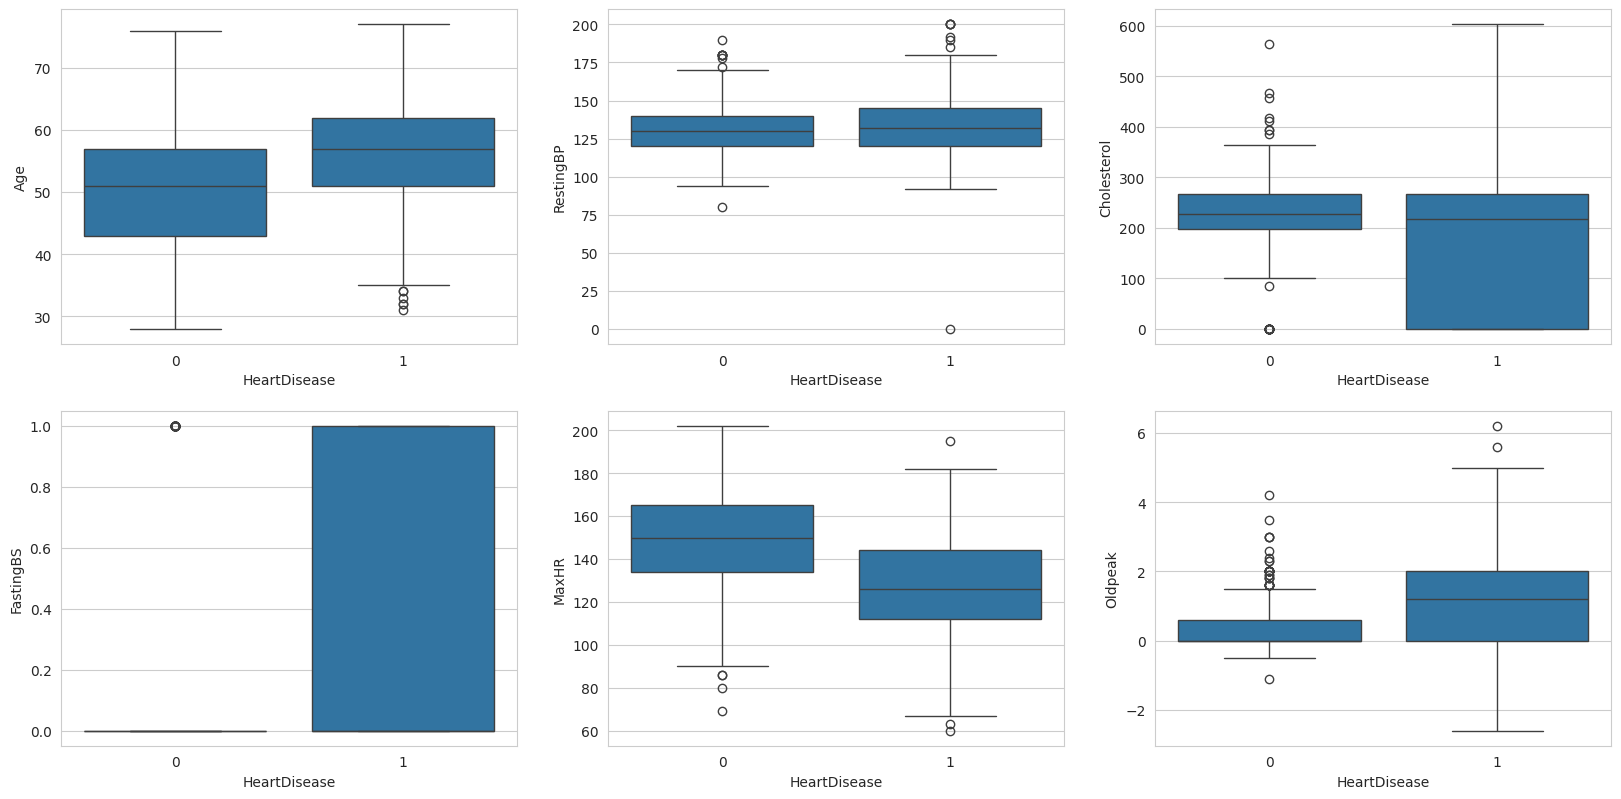

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "HeartDisease":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='HeartDisease', y=feature, data=df)

<Axes: ylabel='RestingBP'>

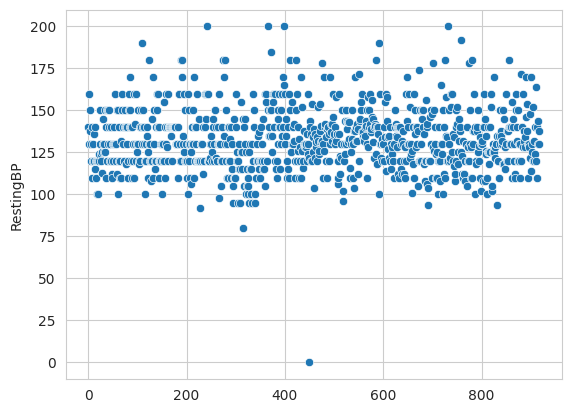

In [ ]:
sns.scatterplot(df['RestingBP'])

**Skewness and Kurtosis**

In [ ]:
skew_vals = df.skew().sort_values(ascending=False)
skew_vals

<ipython-input-224-3c5b321952ea>:1: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



FastingBS       1.264484
Oldpeak         1.022872
RestingBP       0.179839
MaxHR          -0.144359
Age            -0.195933
HeartDisease   -0.215086
Cholesterol    -0.610086
dtype: float64

In summary, positive skewness in some variables implies that there may be outliers or higher values on the right side of the distributions. Negative skewness suggests a potential for lower values on the left side of the distributions. It's essential to consider these skewness values when analyzing and modeling the data, as extreme skewness can affect the performance of certain statistical and machine learning models. If necessary, transformations (e.g., logarithmic transformations) can be applied to make the distributions more symmetrical.

In [ ]:
skew_limit = 0.5 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
skew_vals = df.skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

<ipython-input-226-729f4307de64>:2: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



FastingBS      1.264484
Oldpeak        1.022872
Cholesterol   -0.610086
dtype: float64

In [ ]:
kurtosis_vals = df.kurtosis().sort_values(ascending=False)
kurtosis_vals

<ipython-input-227-1fbc2d986607>:1: FutureWarning:

The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



RestingBP       3.271251
Oldpeak         1.203064
Cholesterol     0.118208
Age            -0.386140
FastingBS      -0.401960
MaxHR          -0.448248
HeartDisease   -1.958008
dtype: float64

Mesokurtic: When the tails of the distibution is similar to the normal distribution then it is mesokurtic. The kutosis for normal distibution is 3.

Leptokurtic: If the kurtosis is greater than 3 then it is leptokurtic. In this case, the tails will be heaviour than the normal distribution which means lots of outliers are present in the data. It can be recognized as thin bell shaped distribution with peak higher than normal distribution.

Platykurtic: Kurtosis will be less than 3 which implies thinner tail or lack of outliers than normal distribution.In case of platykurtic, bell shaped distribution will be broader and peak will be lower than the mesokurtic. Hair et al. (2010) and Bryne (2010) argued that data is considered to be normal if Skewness is between ‐2 to +2 and Kurtosis is between ‐7 to +7.

Multi-normality data tests are performed using leveling asymmetry tests (skewness < 3), (Kurtosis between -2 and 2) and Mardia criterion (< 3). Source Chemingui, H., & Ben lallouna, H. (2013).

Skewness and kurtosis index were used to identify the normality of the data. The result suggested the deviation of data from normality was not severe as the value of skewness and kurtosis index were below 3 and 10 respectively

In [ ]:
kurtosis_limit = 7 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
kurtosis_vals = df.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

<ipython-input-228-eb1cb739f7ff>:2: FutureWarning:

The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Series([], dtype: float64)

Examination of Cat Features

In [ ]:
df[categorical].describe()

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('ChestPainType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('RestingECG').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('ExerciseAngina').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ChestPainType'].value_counts()
    for x_label, grp in _df_4.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('ChestPainType')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['RestingECG'].value_counts()
    for x_label, grp in _df_5.groupby('ChestPainType')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ChestPainType')
_ = plt.ylabel('RestingECG')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ExerciseAngina'].value_counts()
    for x_label, grp in _df_6.groupby('RestingECG')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('RestingECG')
_ = plt.ylabel('ExerciseAngina')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ST_Slope'].value_counts()
    for x_label, grp in _df_7.groupby('ExerciseAngina')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ExerciseAngina')
_ = plt.ylabel('ST_Slope')

In [ ]:
df["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [ ]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

**Features**

In [ ]:
from sklearn.preprocessing import LabelEncoder #Encoding the categorical variables to numerical

To_Encoder = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Enconder_columns = LabelEncoder()

for columns in To_Encoder:
    if columns in Total_columns:
        df[columns] = Enconder_columns.fit_transform(df[columns])

df

NameError: name 'Total_columns' is not defined

<ipython-input-8-14794f550cbb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = df.corr().nlargest(total_count, 'HeartDisease')['HeartDisease'].index


<Axes: >

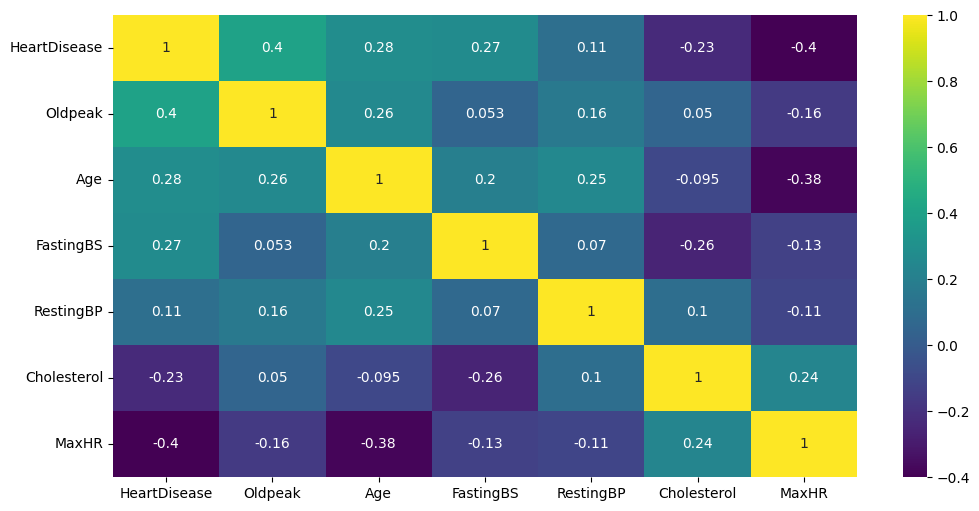

In [ ]:
total_count = 12
cols = df.corr().nlargest(total_count, 'HeartDisease')['HeartDisease'].index
corr_matrix = df[cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap = 'viridis')

In [ ]:
fig = px.scatter(df, x = 'Age', y='RestingBP')
fig.show()

In [ ]:
fig = px.line(df, y='RestingBP')
fig.show()

In [ ]:
# Replace 0 with NaN for better handling
df['RestingBP'].replace(0, np.nan, inplace=True)

# Calculate the average of the 'RestingBP' column
average_RestingBP = df['RestingBP'].mean()

# Fill NaN values in 'RestingBP' with the calculated average
df['RestingBP'].fillna(average_RestingBP, inplace=True)

In [ ]:
fig = px.line(df, y='RestingBP')
fig.show()

In the context of ST depression and elevation:

**Positive oldpeak:**

A positive value typically indicates ST depression, which is a downward deviation of the ST segment below the baseline. It's often associated with myocardial ischemia or other cardiac abnormalities. Anything above 4 mm is often considered a more severe abnormality and may be associated with a higher risk of cardiovascular issues.

**Negative oldpeak:**

A negative value, on the other hand, indicates ST elevation, meaning the ST segment rises above the baseline. ST elevation can be caused by conditions such as ventricular hypertrophy or pericarditis.

In [ ]:
fig = px.line(df, y='Oldpeak')
fig.show()

In [ ]:
fig = px.line(df, y='Oldpeak')
fig.show()

<Axes: ylabel='MaxHR'>

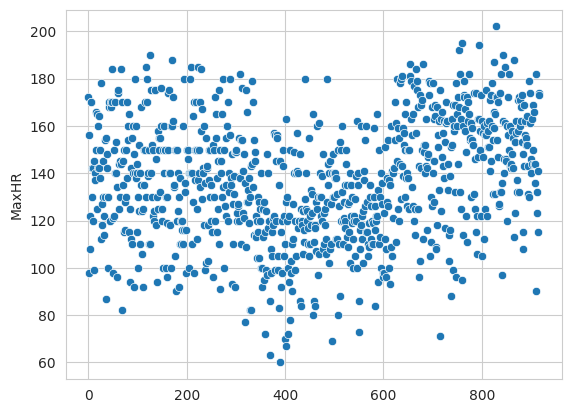

In [ ]:
sns.scatterplot(df['MaxHR'])

In [ ]:
fig = px.scatter(df, x = 'Age', y='MaxHR')
fig.show()

In [ ]:
column_to_plot = ['RestingBP','Cholesterol','MaxHR']
for columns in column_to_plot:
    fig = px.line(df, y=column_to_plot)
    fig.update_layout(title=f'Line Chart for {column_to_plot}')
    fig.show()
    break

In [ ]:
fig = px.line(df, y='Cholesterol')
fig.show()

In this above plot we can see the Cholesterol value is 0 for around 120 records, there is no way for human to live without Cholesterol there is a minimum range according to the age group the values:

Age Below 20:

Desirable: Less than 170 mg/dL
Borderline High: 170-199 mg/dL
High: 200 mg/dL and above

Age 20 and Above:

Desirable: Less than 200 mg/dL
Borderline High: 200-239 mg/dL
High: 240 mg/dL and above
We have handle the values for the Cholesterol!

In [ ]:
print(df[df['Age'] <= 20]['Age'].unique())

[-1.4331398  -0.47848359 -1.75135854 -0.5845565   0.05188098 -1.53921271
 -0.90277524  0.47617263 -1.22099397 -1.64528563 -1.11492106  0.68831845
 -1.85743145 -1.00884815 -0.05419193 -0.16026485 -0.26633776  0.2640268
 -1.32706689 -2.2817231   1.21868302 -1.96350436  0.58224554 -0.37241067
 -0.69062941 -2.38779602 -0.79670232  0.37009972  0.15795389  1.00653719
  1.32475593 -2.06957728 -2.17565019  0.79439137 -2.59994184  0.90046428
 -2.70601475 -2.49386893  2.17333923  1.53690176  1.96119341  1.11261011
  1.64297467  1.43082884  2.06726632  1.74904758  2.49155797  2.27941215
  2.38548506  1.85512049]


In [ ]:
print(df[df['Age'] >= 20]['Age'].unique())

[]


<Axes: xlabel='Cholesterol', ylabel='Density'>

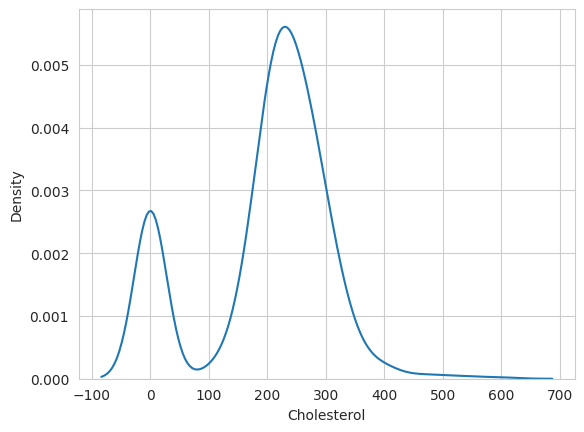

In [ ]:
sns.kdeplot(data=df, x="Cholesterol")

In [ ]:
def replace_zero_cholesterol(df):
    # Step 1: Create age groups and calculate average cholesterol for each group
    age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
    age_labels = [f'{start}-{end}' for start, end in zip(age_bins[:-1], age_bins[1:])]
    df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
    average_cholesterol_by_age = df.groupby('AgeGroup')['Cholesterol'].median()

    # Step 2: Replace zero values in 'Cholesterol' with average values based on age groups
    def replace_zero(row):
        if row['Cholesterol'] == 0:
            return average_cholesterol_by_age[row['AgeGroup']]
        else:
            return row['Cholesterol']

    df['Cholesterol'] = df.apply(replace_zero, axis=1)

    # Drop the temporary 'AgeGroup' column
    df.drop(columns=['AgeGroup'], inplace=True)

# Example usage:
replace_zero_cholesterol(df)

In [ ]:
fig = px.scatter(df, y = 'Age',x='Cholesterol', color='Cholesterol' ) #Verifying thr Imputed Values with Age
fig.show()

In [ ]:
fig = px.line(df, y='Cholesterol')
fig.show()

<ipython-input-237-dfd42b60ba4f>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




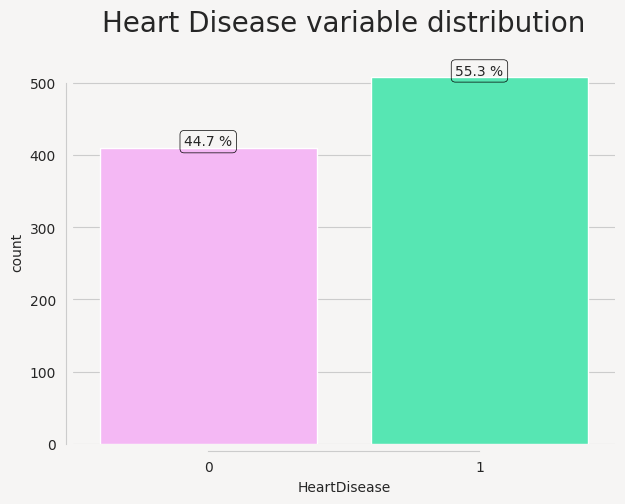

In [ ]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HeartDisease'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Heart Disease variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [ ]:
# numerical fearures 6
num_feats = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR','Oldpeak']
# categorical (binary)
bin_feats = ['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease']
# caterorical (multi-)
nom_feats= ['ChestPainType', 'RestingECG', 'ST_Slope']
cat_feats = nom_feats + bin_feats

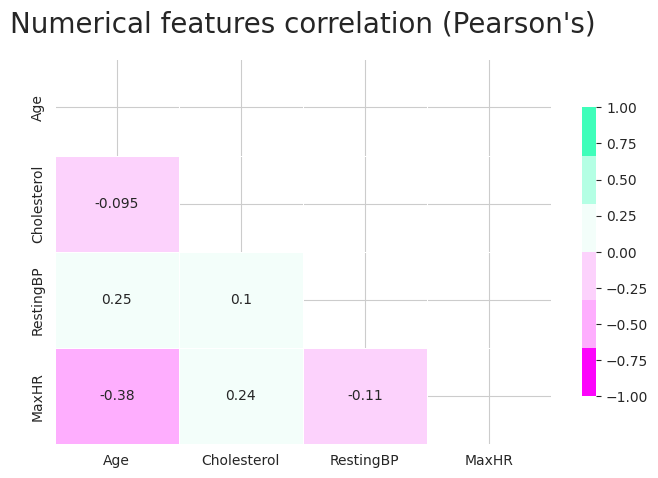

In [ ]:
df_1 = df[num_feats]
corr = df_1.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

Text(0.5, 1.0, 'Gender v/s Heart Disease\n')

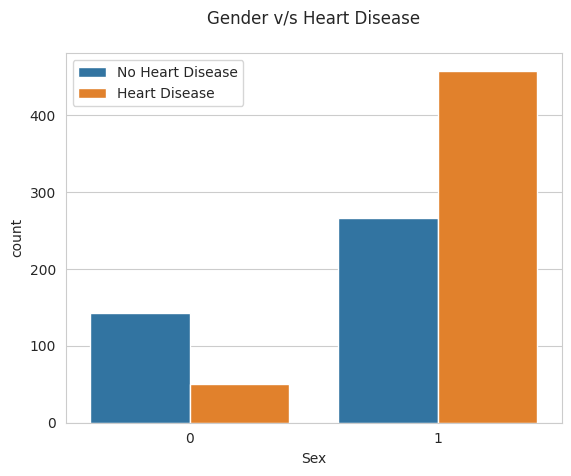

In [ ]:
#df['Sex'].head(5)
sns.countplot(data= df, x='Sex',hue='HeartDisease') #0- F, 1- M
plt.legend(labels=['No Heart Disease', 'Heart Disease'])
plt.title('Gender v/s Heart Disease\n')

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 9.2 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
#import shap

In [ ]:
df.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df1 = data.copy(deep = True)

df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

def robust_scale_feature(data, feature_name):
    # Ensure the feature exists in the data
    if feature_name not in data.columns:
        print(f"Error: {feature_name} not found in the dataset.")
        return None

    # Extract the feature to be scaled
    feature_data = data[[feature_name]]

    # Initialize the RobustScaler
    scaler = RobustScaler()

    # Fit and transform the data using RobustScaler
    scaled_data = scaler.fit_transform(feature_data)

    # Replace the original feature with the scaled feature in the DataFrame
    data[feature_name] = scaled_data

    return data

# Example usage:
# Assuming you have a pandas DataFrame called 'df' with a column named 'your_feature'
# Replace 'your_feature' with the actual feature name in your dataset
# The function modifies the original DataFrame in-place
df1=robust_scale_feature(df, 'Oldpeak')
df1=robust_scale_feature(df,'RestingBP')

# Display the DataFrame with the original feature replaced by the scaled feature
print(df1.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        0.5          289          0           1   
1   49    0              2        1.5          180          0           1   
2   37    1              1        0.0          283          0           2   
3   48    0              0        0.4          214          0           1   
4   54    1              2        1.0          195          0           1   

   MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0    172               0 -0.400000         2             0  
1    156               0  0.266667         1             1  
2     98               0 -0.400000         2             0  
3    108               1  0.600000         1             1  
4    122               0 -0.400000         2             0  


In [ ]:
#data = cat_feats
from sklearn.preprocessing import MinMaxScaler,StandardScaler

seed = 0
test_size = 0.30

features = df.columns[:-1]

scaler = MinMaxScaler()
ss = StandardScaler() # Standardization

#df['Oldpeak'] = scaler.fit_transform(df[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
#df['RestingBP'] = scaler.fit_transform(df[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
#df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
#df

X = df1[features]
y = df1['HeartDisease']

df1.head(5)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0 -1.433140    1              1        0.5     0.825070          0   
1 -0.478484    0              2        1.5    -0.171961          0   
2 -1.751359    1              1        0.0     0.770188          0   
3 -0.584556    0              0        0.4     0.139040          0   
4  0.051881    1              2        1.0    -0.034755          0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0           1  1.382928               0 -0.400000         2             0  
1           1  0.754157               0  0.266667         1             1  
2           2 -1.525138               0 -0.400000         2             0  
3           1 -1.132156               1  0.600000         1             1  
4           1 -0.581981               0 -0.400000         2             0

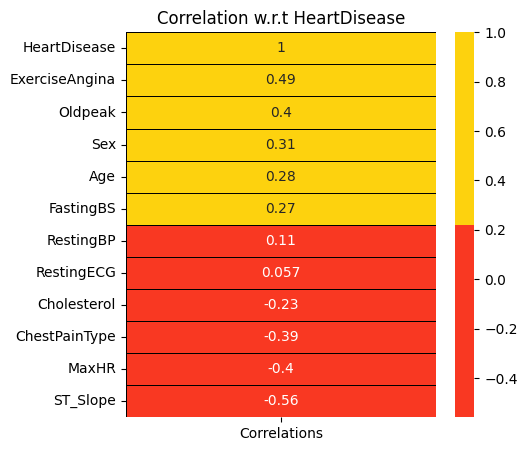

In [ ]:
corr = df.corrwith(df['HeartDisease']).sort_values(ascending = False).to_frame()
colors = ['#F93822','#FDD20E']
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

Except for RestingBP and RestingECG, everyone displays a positive or negative relationship with HeartDisease

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=seed)

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=seed)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)
# classifier algorithms with default parameters

names = [
    #'Logistic Regression',
    'CatBoost',
    #'K Neighbours',
    'Support Vectors',
    #'Nu SVC',
    #'Decision Tree',
    'Random Forest',
    #'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear Discriminant Analysis',
    #'Quadratic DA'
    #"Neural Net"
]

classifiers = [
    #LogisticRegression(random_state = 0,C=10,penalty= 'l2'),
    CatBoostClassifier(random_state=seed, verbose=0),
    #KNeighborsClassifier(),
    SVC(probability=True, random_state=seed),
    #NuSVC(probability=True, random_state=seed),
    #DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=0),
    #AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    #QuadraticDiscriminantAnalysis(),
    #MLPClassifier(random_state=seed),
]

In [ ]:
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score
def score_summary(names, classifiers):
    '''
    Given a list of classiers, this function calculates the accuracy,
    ROC_AUC and Recall and returns the values in a dataframe
    '''

    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        precision=precision_score(y_val,pred)

        Recall=recall_score(y_val,pred)

        Fscore=f1_score(y_val,pred)

        # confusion matric, cm
        cm = confusion_matrix(y_val, pred)

        # recall: TP/(TP+FN)
        #recall = cm[1,1]/(cm[1,1] +cm[1,0])

        # precision: TP/(TP+FP)
        #precision = cm[1,1]/(cm[1,1] +cm[0,1])

        # F1 score: TP/(TP+FP)
        #f1 = 2*recall*precision/(recall + precision)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, Recall, precision, Fscore]], columns=cols)
        data_table = data_table.append(df)

    return(np.round(data_table.reset_index(drop=True), 2))


def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in a subplots.

    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''

    fig = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))

    i = 0
    for clf in zip(classifiers):

        clf.fit(X_train, y_train)
        ConfusionMatrixDisplay(clf, X_val, y_val)
        ax.title.set_text(names[i])
        i = i + 1

    plt.tight_layout()
    plt.show()


def roc_auc_curve(names, classifiers):
    '''
    Given a list of classifiers, this function plots the ROC curves

    '''
    plt.figure(figsize=(12, 8))

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred_proba = clf.predict_proba(X_val)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")

In [ ]:
score_summary(names, classifiers).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='blue')

<ipython-input-19-3c0a2a02d6be>:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-19-3c0a2a02d6be>:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-19-3c0a2a02d6be>:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-19-3c0a2a02d6be>:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-19-3c0a2a02d6be>:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-19-3c0a2a02d6be>:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [ ]:
nb = GaussianNB()

nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
ypred1_test1=nb.predict(X_val)
accuracy1_test1 = accuracy_score(y_val, ypred1_test1)
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
print(f"Accuracy test: {round(accuracy1_test1 * 100,2)}%")
print("Precision : ",'{0:.2%}'.format(precision_score(y_val,ypred1_test1)))
print("Recall : ",'{0:.2%}'.format(recall_score(y_val,ypred1_test1)))
print("F1 score: ",'{0:.2%}'.format(f1_score(y_val,ypred1_test1)))
print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(nb,X_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
#ypred1_train=lr.predict(X_val)

Accuracy test: 85.87%
Precision :  87.80%
Recall :  88.34%
F1 score:  88.07%
Cross Validation Score :  91.03%


In [ ]:
lr=LogisticRegression(random_state = 0,C=10,penalty= 'l2')

lr.fit(X_train,y_train)

LogisticRegression(C=10, random_state=0)

In [ ]:
ypred1_test=lr.predict(X_val)
accuracy1_test = accuracy_score(y_val, ypred1_test)
print(f"Accuracy test: {round(accuracy1_test * 100,2)}%")

ypred1_train=lr.predict(X_val)
#accuracy1_train = accuracy_score(y_train, ypred1_train)
#print(f"Accuracy train: {round(accuracy1_train * 100,2)}%")

Accuracy test: 85.14%


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score

print("Classification Report:")
print(classification_report(y_val, ypred1_test))
pecision1=precision_score(y_val,ypred1_test)
Recall1=recall_score(y_val,ypred1_test)
Fscore1=f1_score(y_val,ypred1_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       113
           1       0.86      0.88      0.87       163

    accuracy                           0.84       276
   macro avg       0.84      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



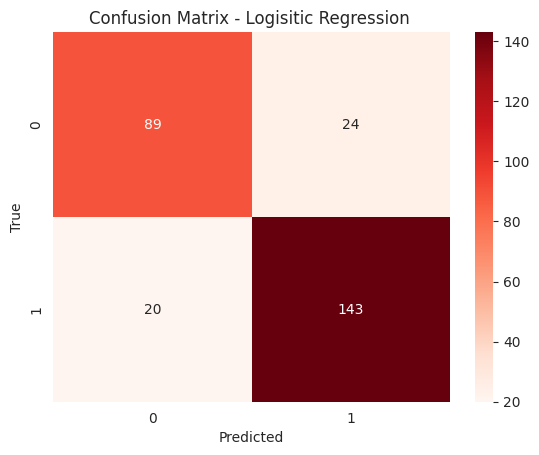

In [ ]:
conf_matrix = confusion_matrix(y_val, ypred1_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logisitic Regression ')
plt.show()

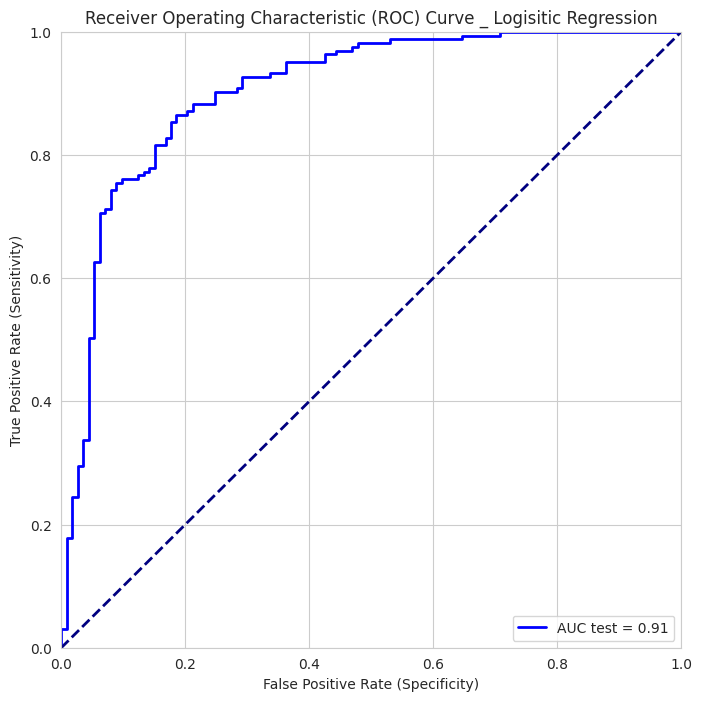

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
ypred1_tp=lr.predict_proba(X_val)[:, 1]
roc_auc1 = roc_auc_score(y_val,ypred1_tp)
fpr, tpr, thresholds = roc_curve(y_val, ypred1_tp)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC test = {roc_auc1:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve _ Logisitic Regression')
plt.legend(loc='lower right')
plt.show()

In [ ]:
lda=LinearDiscriminantAnalysis()

lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
ypred2_test=lda.predict(X_val)
accuracy2_test = accuracy_score(y_val, ypred2_test)
print(f"Accuracy test: {round(accuracy2_test * 100,2)}%")
#print(f"Accuracy test: {round(accuracy1_test1 * 100,2)}%")
print("Precision : ",'{0:.2%}'.format(precision_score(y_val,ypred2_test)))
print("Recall : ",'{0:.2%}'.format(recall_score(y_val,ypred2_test)))
print("F1 score: ",'{0:.2%}'.format(f1_score(y_val,ypred2_test)))

Accuracy test: 84.06%
Precision :  87.42%
Recall :  85.28%
F1 score:  86.34%


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       113
           1       0.87      0.85      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



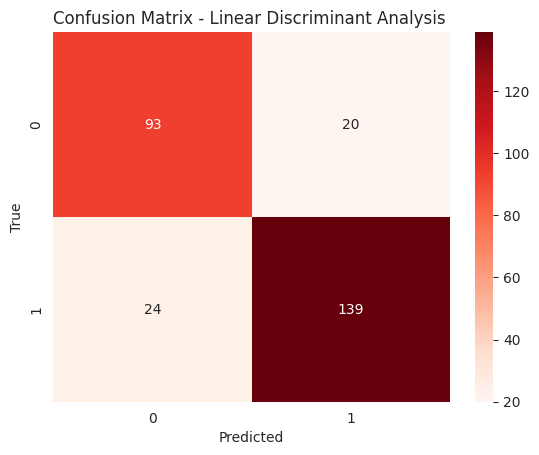

In [ ]:
print("Classification Report:")
print(classification_report(y_val, ypred2_test))
pecision4=precision_score(y_val,ypred2_test)
Recall4=recall_score(y_val,ypred2_test)
Fscore4=f1_score(y_val,ypred2_test)

conf_matrix = confusion_matrix(y_val, ypred2_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Linear Discriminant Analysis ')
plt.show()

In [ ]:
gr = GradientBoostingClassifier()

gr.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
ypred3_test = gr.predict(X_val)

accuracy3_test = accuracy_score(y_val, ypred3_test)
#print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(gr,X_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
print(f"Test Accuracy: {round(accuracy3_test * 100,2)}%")
#print(f"Accuracy test: {round(accuracy1_test1 * 100,2)}%")
print("Precision : ",'{0:.2%}'.format(precision_score(y_val,ypred3_test)))
print("Recall : ",'{0:.2%}'.format(recall_score(y_val,ypred3_test)))
print("F1 score: ",'{0:.2%}'.format(f1_score(y_val,ypred3_test)))


Test Accuracy: 87.68%
Precision :  88.62%
Recall :  90.80%
F1 score:  89.70%


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85       113
         1.0       0.89      0.91      0.90       163

    accuracy                           0.88       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



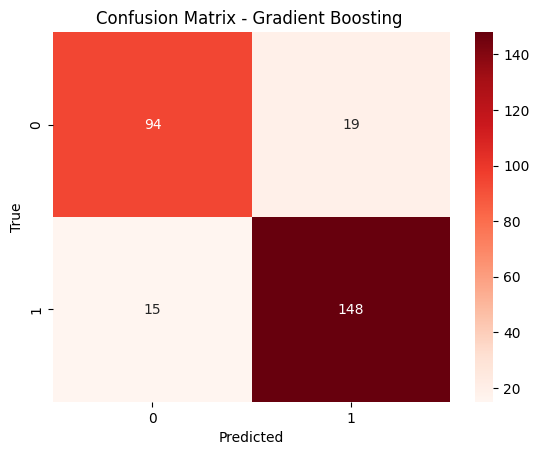

In [ ]:
print("Classification Report:")
print(classification_report(y_val, ypred3_test))
pecision4=precision_score(y_val,ypred3_test)
Recall4=recall_score(y_val,ypred3_test)
Fscore4=f1_score(y_val,ypred3_test)

conf_matrix = confusion_matrix(y_val, ypred3_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting ')
plt.show()

In [ ]:
cat = CatBoostClassifier()
cat.fit(X_train,y_train)

Learning rate set to 0.008526
0:	learn: 0.6854223	total: 3.17ms	remaining: 3.16s
1:	learn: 0.6776146	total: 4.95ms	remaining: 2.47s
2:	learn: 0.6706538	total: 6.53ms	remaining: 2.17s
3:	learn: 0.6651620	total: 8.35ms	remaining: 2.08s
4:	learn: 0.6578855	total: 9.87ms	remaining: 1.96s
5:	learn: 0.6505995	total: 11.4ms	remaining: 1.89s
6:	learn: 0.6439392	total: 12.7ms	remaining: 1.79s
7:	learn: 0.6376651	total: 13.8ms	remaining: 1.71s
8:	learn: 0.6310682	total: 15.1ms	remaining: 1.67s
9:	learn: 0.6246911	total: 16.7ms	remaining: 1.65s
10:	learn: 0.6197069	total: 18.5ms	remaining: 1.66s
11:	learn: 0.6133330	total: 19.9ms	remaining: 1.63s
12:	learn: 0.6069128	total: 21.4ms	remaining: 1.62s
13:	learn: 0.6012864	total: 22.6ms	remaining: 1.59s
14:	learn: 0.5959876	total: 23.9ms	remaining: 1.57s
15:	learn: 0.5902977	total: 25.3ms	remaining: 1.55s
16:	learn: 0.5844817	total: 26.6ms	remaining: 1.54s
17:	learn: 0.5788407	total: 27.8ms	remaining: 1.52s
18:	learn: 0.5729966	total: 29.2ms	remaining

In [ ]:
ypred5_test = cat.predict(X_val)

accuracy5_test = accuracy_score(y_val, ypred5_test)
print(f"Test Accuracy: {round(accuracy5_test * 100,2)}%")
#print(f"Accuracy test: {round(accuracy1_test1 * 100,2)}%")
print("Precision : ",'{0:.2%}'.format(precision_score(y_val,ypred5_test)))
print("Recall : ",'{0:.2%}'.format(recall_score(y_val,ypred5_test)))
print("F1 score: ",'{0:.2%}'.format(f1_score(y_val,ypred5_test)))


Test Accuracy: 85.14%
Precision :  87.20%
Recall :  87.73%
F1 score:  87.46%


Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82       113
         1.0       0.87      0.88      0.87       163

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



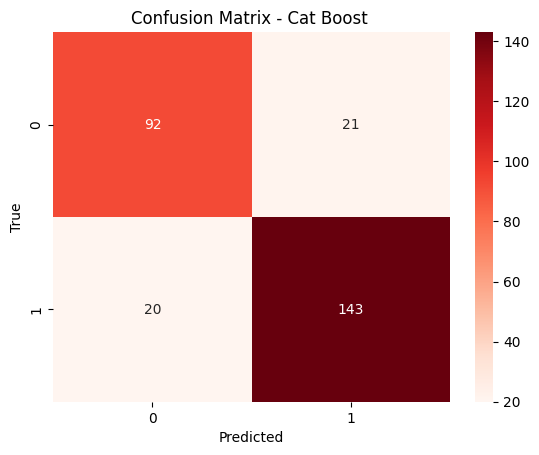

In [ ]:
print("Classification Report:")
print(classification_report(y_val, ypred5_test))
pecision4=precision_score(y_val,ypred5_test)
Recall4=recall_score(y_val,ypred5_test)
Fscore4=f1_score(y_val,ypred5_test)

conf_matrix = confusion_matrix(y_val, ypred5_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Cat Boost ')
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
ypred4_test = rf.predict(X_val)

accuracy4_test = accuracy_score(y_val, ypred4_test)
print(f"Test Accuracy: {round(accuracy4_test * 100,2)}%")
print("Precision : ",'{0:.2%}'.format(precision_score(y_val,ypred4_test)))
print("Recall : ",'{0:.2%}'.format(recall_score(y_val,ypred4_test)))
print("F1 score: ",'{0:.2%}'.format(f1_score(y_val,ypred4_test)))
ypred4_train = rf.predict(X_train)

Test Accuracy: 86.23%
Precision :  87.43%
Recall :  89.57%
F1 score:  88.48%


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score

print("Classification Report:")
print(classification_report(y_val, ypred4_test))
pecision1=precision_score(y_val,ypred4_test)
Recall1=recall_score(y_val,ypred4_test)
Fscore1=f1_score(y_val,ypred4_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       113
           1       0.87      0.90      0.88       163

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.86       276
weighted avg       0.86      0.86      0.86       276



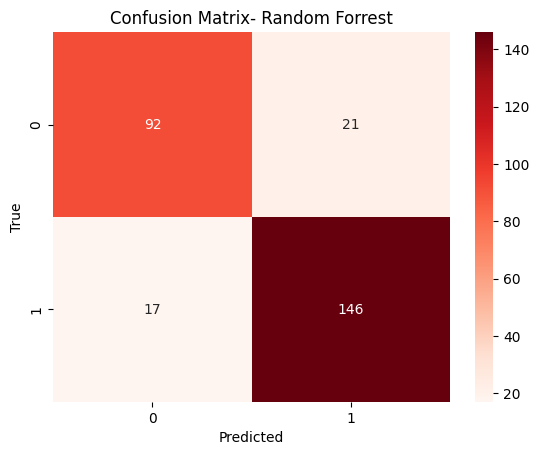

In [ ]:
conf_matrix = confusion_matrix(y_val, ypred4_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix- Random Forrest')
plt.show()

In [ ]:
ypred4_tp=rf.predict_proba(X_val)[:, 1]
roc_auc4 = roc_auc_score(y_val,ypred4_tp)
fpr, tpr, thresholds = roc_curve(y_val, ypred4_tp)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC test = {roc_auc4:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forrest')
plt.legend(loc='lower right')
plt.show()

NameError: name 'roc_auc_score' is not defined

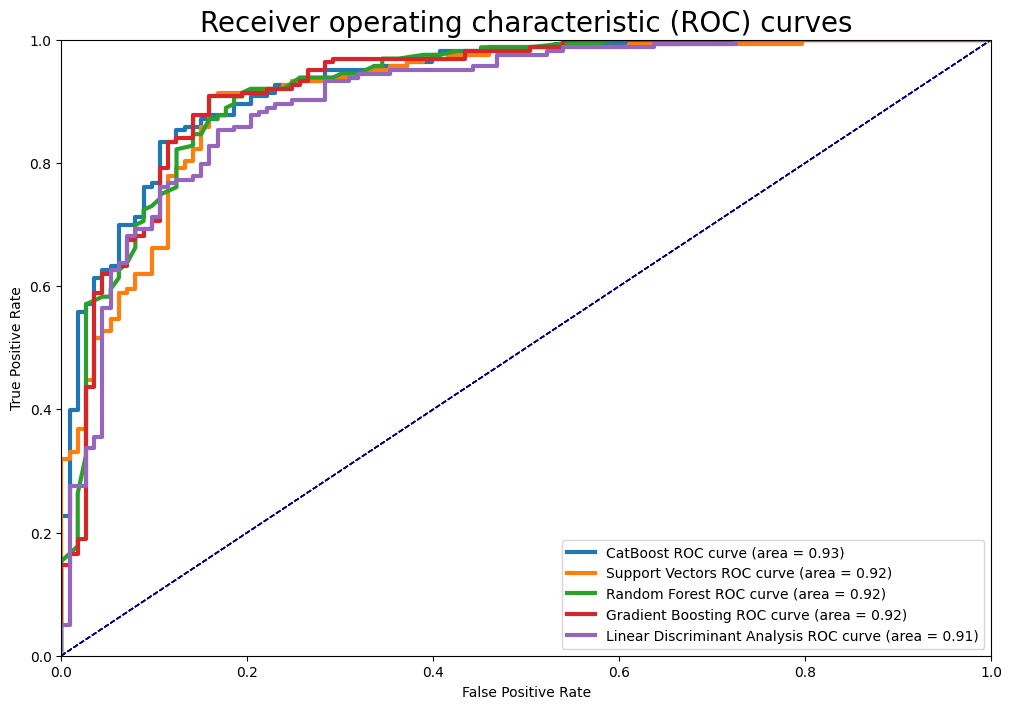

In [ ]:
roc_auc_curve(names, classifiers)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X is feature matrix and y is your target variable
# Replace X and y with actual feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions on the test set
y_pred = best_estimator.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.9492753623188406


In [ ]:
from sklearn.metrics import classification_report


# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy}")
print("Precision : ",'{0:.2%}'.format(precision_score(y_val,y_pred)))
print("Recall : ",'{0:.2%}'.format(recall_score(y_val,y_pred)))
print("F1 score: ",'{0:.2%}'.format(f1_score(y_val,y_pred)))

# Print the classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.9492753623188406
Precision :  94.61%
Recall :  96.93%
F1 score:  95.76%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       113
           1       0.95      0.97      0.96       163

    accuracy                           0.95       276
   macro avg       0.95      0.94      0.95       276
weighted avg       0.95      0.95      0.95       276



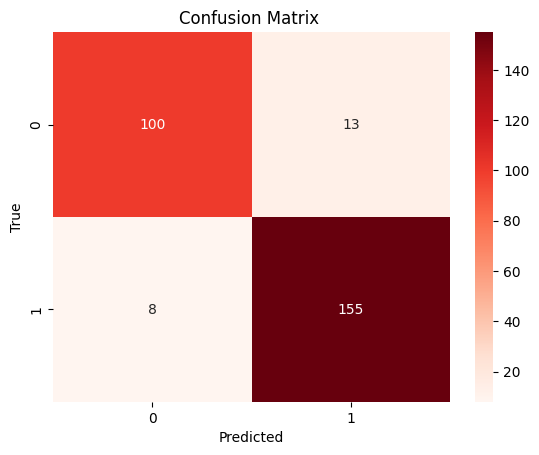

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold


lr = LogisticRegression(tol=1e-4, max_iter=1000, random_state=seed)

#nb_rand= GaussianNB()

space = dict(C=uniform(loc=0, scale=5),
                     penalty=['l2', 'l1'],
                     solver= ['liblinear'])

search = RandomizedSearchCV(lr,
                         space,
                         random_state=seed,
                         cv = 5,
                         scoring='f1')

rand_search = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % rand_search.best_params_)

Best Hyperparameters: {'C': 3.1178184839298617, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
print('Best Hyperparameters: %s' % rand_search.best_params_)
#print(f"Test Accuracy: {accuracy}")
print(" ")
params = rand_search.best_params_
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)
print(classification_report(y_val, lr.predict(X_val)))

Best Hyperparameters: {'C': 3.1178184839298617, 'penalty': 'l2', 'solver': 'liblinear'}
 
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       113
           1       0.87      0.88      0.87       163

    accuracy                           0.85       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.85      0.85       276



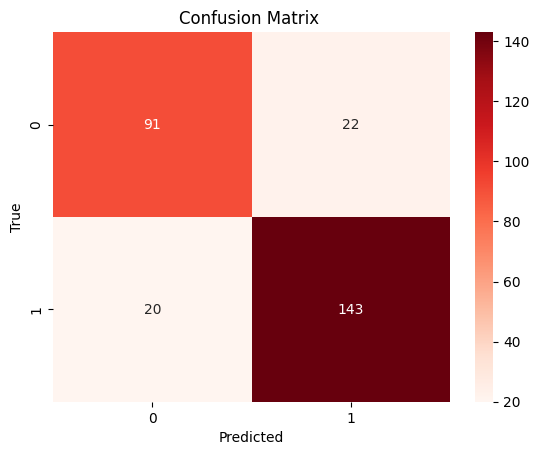

In [ ]:
conf_matrix = confusion_matrix(y_val, lr.predict(X_val))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

In [ ]:
#ANN - TANH Activation
import keras
model3 = keras.Sequential(
    [
        keras.layers.Dense(units=9,activation="tanh", input_shape=(X_train.shape[-1],) ),
        keras.layers.Dense(units=9, activation="tanh"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights3 = model3.get_weights()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
learning_rate = 0.001

model3.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=keras.metrics.AUC()
             )

In [ ]:
history = model3.fit(X_train, y_train,
          epochs=500,
          batch_size=100, validation_data=(X_val, y_val),
          verbose=1)

Epoch 1/500
7/7 [==============================] - 1s 54ms/step - loss: 0.6901 - auc_1: 0.6251 - val_loss: 0.7310 - val_auc_1: 0.5627
Epoch 2/500
7/7 [==============================] - 0s 9ms/step - loss: 0.6680 - auc_1: 0.6563 - val_loss: 0.7062 - val_auc_1: 0.5943
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 0.6505 - auc_1: 0.6787 - val_loss: 0.6844 - val_auc_1: 0.6232
Epoch 4/500
7/7 [==============================] - 0s 11ms/step - loss: 0.6337 - auc_1: 0.7015 - val_loss: 0.6656 - val_auc_1: 0.6500
Epoch 5/500
7/7 [==============================] - 0s 12ms/step - loss: 0.6199 - auc_1: 0.7198 - val_loss: 0.6486 - val_auc_1: 0.6735
Epoch 6/500
7/7 [==============================] - 0s 9ms/step - loss: 0.6074 - auc_1: 0.7358 - val_loss: 0.6335 - val_auc_1: 0.6947
Epoch 7/500
7/7 [==============================] - 0s 9ms/step - loss: 0.5960 - auc_1: 0.7506 - val_loss: 0.6205 - val_auc_1: 0.7143
Epoch 8/500
7/7 [==============================] - 0s 11ms/step - 

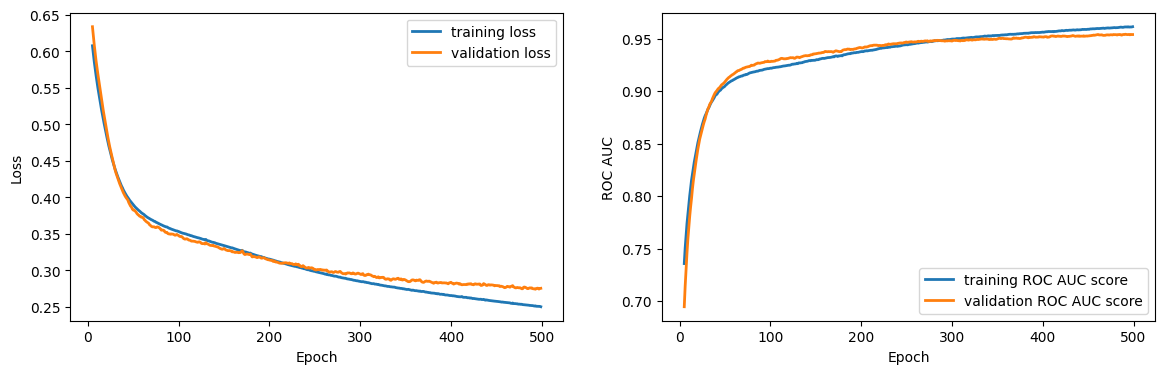

In [ ]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc_1"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc_1"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [ ]:
predicted = model3.predict(np.concatenate((X_train,X_val),axis=0))
predicted = (predicted>0.5).astype(int)

29/29 [==============================] - 0s 1ms/step


In [ ]:
t = np.concatenate((y_train,y_val),axis=0)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("accuracy: " + str(accuracy_score(t, predicted))+"\n")
print("precision: " + str(precision_score(t, predicted))+"\n")
print("recall score: " + str(recall_score(t, predicted))+"\n")
print("f1 score: " + str(f1_score(t, predicted))+"\n")

accuracy: 0.8965141612200436

precision: 0.8992248062015504

recall score: 0.9151873767258383

f1 score: 0.9071358748778103



In [ ]:
# Obtain feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

Feature  Importance
10        ST_Slope    0.239935
9          Oldpeak    0.128071
2    ChestPainType    0.109217
4      Cholesterol    0.099635
7            MaxHR    0.095655
0              Age    0.090056
8   ExerciseAngina    0.088022
3        RestingBP    0.074312
1              Sex    0.027101
6       RestingECG    0.025622
5        FastingBS    0.022376

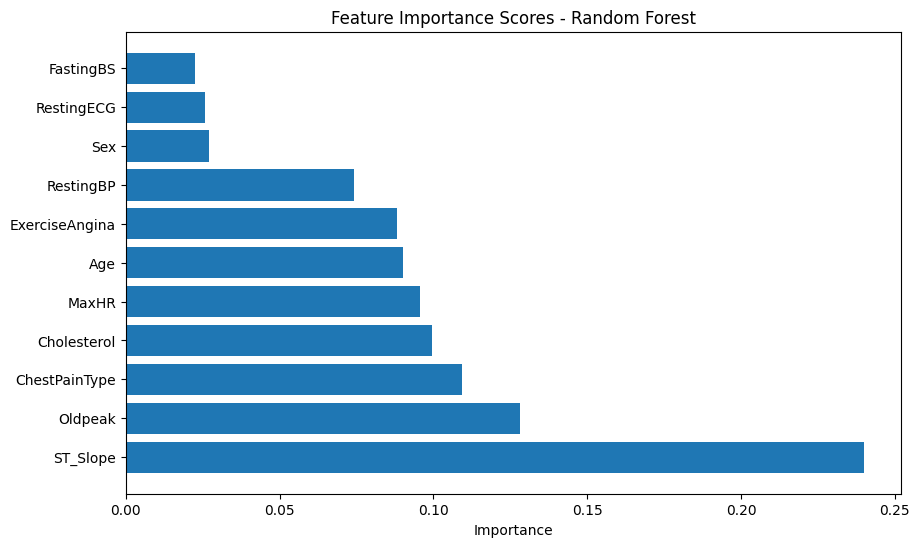

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance Scores - Random Forest')
plt.show()

In [ ]:
#Sigmoid
import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
model2 = keras.Sequential(
    [
        keras.layers.Dense(units=9, kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros(),activation="sigmoid", input_shape=(X_train.shape[-1],) ),
        keras.layers.Dense(units=9, activation="sigmoid",kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros()),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights2 = model2.get_weights()

In [ ]:
learning_rate = 0.001

model2.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=keras.metrics.AUC()
             )

In [ ]:
history2 = model2.fit(X_train, y_train,
          epochs=500,
          batch_size=100, validation_data=(X_val, y_val),
          verbose=1)

Epoch 1/500
8/8 [==============================] - 1s 30ms/step - loss: 0.7123 - auc_4: 0.4978 - val_loss: 0.7175 - val_auc_4: 0.5000
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 0.7060 - auc_4: 0.4953 - val_loss: 0.7089 - val_auc_4: 0.5000
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 0.7007 - auc_4: 0.5197 - val_loss: 0.7016 - val_auc_4: 0.6089
Epoch 4/500
8/8 [==============================] - 0s 8ms/step - loss: 0.6963 - auc_4: 0.5543 - val_loss: 0.6958 - val_auc_4: 0.5000
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 0.6930 - auc_4: 0.5799 - val_loss: 0.6908 - val_auc_4: 0.7308
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 0.6900 - auc_4: 0.6640 - val_loss: 0.6866 - val_auc_4: 0.7639
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 0.6882 - auc_4: 0.6661 - val_loss: 0.6825 - val_auc_4: 0.8118
Epoch 8/500
8/8 [==============================] - 0s 7ms/step - los

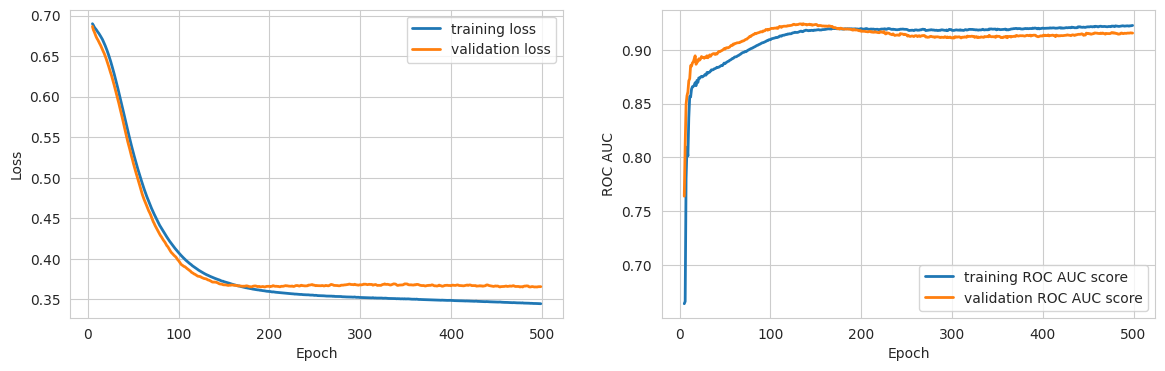

In [ ]:
logs = pd.DataFrame(history2.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc_4"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc_4"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [ ]:
predicted2 = model2.predict(np.concatenate((X_train,X_val),axis=0))
predicted2 = (predicted2>0.5).astype(int)

32/32 [==============================] - 0s 1ms/step


In [ ]:
print("accuracy: " + str(accuracy_score(t, predicted2))+"\n")
print("precision: " + str(precision_score(t, predicted2))+"\n")
print("recall score: " + str(recall_score(t, predicted2))+"\n")
print("f1 score: " + str(f1_score(t, predicted2))+"\n")

accuracy: 0.8663366336633663

precision: 0.8654173764906303

recall score: 0.900709219858156

f1 score: 0.8827106863596873



In [ ]:
#Relu Function
model = keras.Sequential(
    [
        keras.layers.Dense(units=9, kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros(),activation="relu", input_shape=(X_train.shape[-1],) ),
        keras.layers.Dense(units=9, activation="relu",kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros()),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights = model.get_weights()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 9)                 108       
                                                                 
 dense_7 (Dense)             (None, 9)                 90        
                                                                 
 dense_8 (Dense)             (None, 1)                 10        
                                                                 
Total params: 208 (832.00 Byte)
Trainable params: 208 (832.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
learning_rate = 0.001

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=keras.metrics.AUC()
             )

In [ ]:
history3 = model.fit(X_train, y_train,
          epochs=500,
          batch_size=100, validation_data=(X_val, y_val),
          verbose=1)

Epoch 1/500
7/7 [==============================] - 2s 67ms/step - loss: 0.6926 - auc_2: 0.4953 - val_loss: 0.6898 - val_auc_2: 0.5798
Epoch 2/500
7/7 [==============================] - 0s 14ms/step - loss: 0.6896 - auc_2: 0.7265 - val_loss: 0.6851 - val_auc_2: 0.8366
Epoch 3/500
7/7 [==============================] - 0s 14ms/step - loss: 0.6847 - auc_2: 0.8225 - val_loss: 0.6770 - val_auc_2: 0.8595
Epoch 4/500
7/7 [==============================] - 0s 14ms/step - loss: 0.6769 - auc_2: 0.8398 - val_loss: 0.6648 - val_auc_2: 0.8767
Epoch 5/500
7/7 [==============================] - 0s 15ms/step - loss: 0.6657 - auc_2: 0.8533 - val_loss: 0.6485 - val_auc_2: 0.8862
Epoch 6/500
7/7 [==============================] - 0s 15ms/step - loss: 0.6518 - auc_2: 0.8577 - val_loss: 0.6295 - val_auc_2: 0.8889
Epoch 7/500
7/7 [==============================] - 0s 15ms/step - loss: 0.6368 - auc_2: 0.8547 - val_loss: 0.6082 - val_auc_2: 0.8888
Epoch 8/500
7/7 [==============================] - 0s 16ms/ste

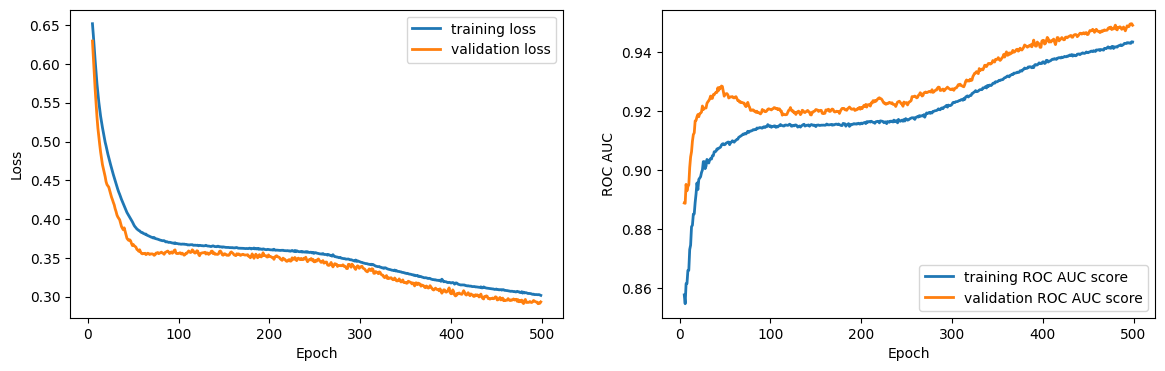

In [ ]:
logs = pd.DataFrame(history3.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc_2"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc_2"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [ ]:
predicted3 = model.predict(np.concatenate((X_train,X_val),axis=0))
predicted3 = (predicted3>0.5).astype(int)

29/29 [==============================] - 0s 1ms/step


In [ ]:
print("accuracy: " + str(accuracy_score(t, predicted3))+"\n")
print("precision: " + str(precision_score(t, predicted3))+"\n")
print("recall score: " + str(recall_score(t, predicted3))+"\n")
print("f1 score: " + str(f1_score(t, predicted3))+"\n")

accuracy: 0.8681917211328976

precision: 0.8600746268656716

recall score: 0.9092702169625246

f1 score: 0.8839884947267498



L2 regularization, also known as weight decay or Ridge regularization, is a technique used to prevent overfitting in machine learning models, particularly in the context of neural networks. It is achieved by adding a penalty term to the loss function that discourages large weights. The regularization term is proportional to the square of the magnitudes of the weights.

In [ ]:
#RelU Function with L2 regularization of strength of 0.001
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume you have your features X and labels y
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Build a neural network with L2 regularization
model4 = Sequential()
model4.add(Dense(128, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.001)))
model4.add(Dropout(0.5))
model4.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history4 = model4.fit(X_train, y_train, epochs=500, batch_size=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/500
7/7 [==============================] - 1s 44ms/step - loss: 0.8186 - accuracy: 0.5685 - val_loss: 0.6720 - val_accuracy: 0.7935
Epoch 2/500
7/7 [==============================] - 0s 10ms/step - loss: 0.7134 - accuracy: 0.6573 - val_loss: 0.6113 - val_accuracy: 0.8225
Epoch 3/500
7/7 [==============================] - 0s 11ms/step - loss: 0.6696 - accuracy: 0.7321 - val_loss: 0.5708 - val_accuracy: 0.8152
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 0.6171 - accuracy: 0.7773 - val_loss: 0.5378 - val_accuracy: 0.8225
Epoch 5/500
7/7 [==============================] - 0s 11ms/step - loss: 0.5814 - accuracy: 0.7928 - val_loss: 0.5139 - val_accuracy: 0.8261
Epoch 6/500
7/7 [==============================] - 0s 11ms/step - loss: 0.5733 - accuracy: 0.7850 - val_loss: 0.4951 - val_accuracy: 0.8406
Epoch 7/500
7/7 [==============================] - 0s 11ms/step - loss: 0.5725 - accuracy: 0.7835 - val_loss: 0.4818 - val_accuracy: 0.8442
Epoch 8/500
7/7 [====

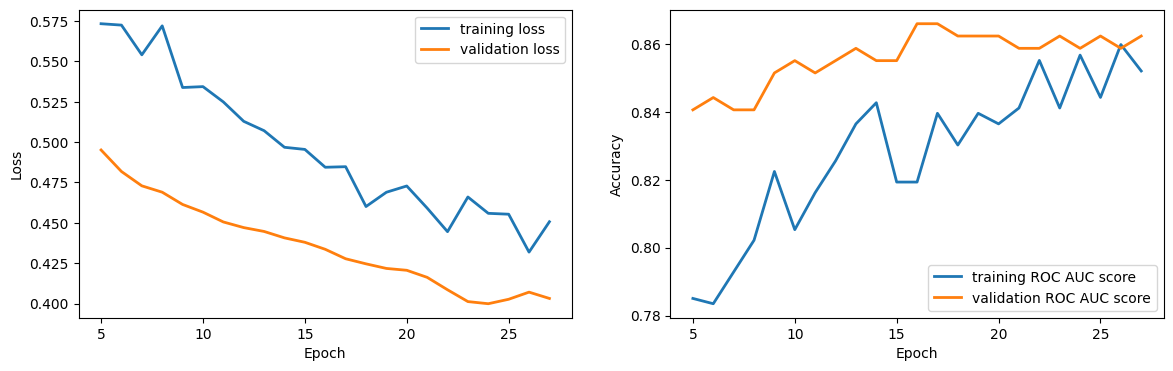

In [ ]:
logs = pd.DataFrame(history4.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"accuracy"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_accuracy"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

In [ ]:
predicted4 = model4.predict(np.concatenate((X_train,X_val),axis=0))
predicted4 = (predicted4>0.5).astype(int)

29/29 [==============================] - 0s 2ms/step


In [ ]:

print("accuracy: " + str(accuracy_score(t, predicted4))+"\n")
print("precision: " + str(precision_score(t, predicted4))+"\n")
print("recall score: " + str(recall_score(t, predicted4))+"\n")
print("f1 score: " + str(f1_score(t, predicted4))+"\n") #No changes in RelU with l2 and early stopping

accuracy: 0.8627450980392157

precision: 0.87279843444227

recall score: 0.8796844181459567

f1 score: 0.8762278978388998



In [ ]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

names_boost =[
    'Catboost',
    'xgbbost',
    'light GBM'
]
classifiers = [
    CatBoostClassifier(random_state=seed, verbose=0),
    XGBClassifier(objective= 'binary:logistic', random_state=seed),
    LGBMClassifier(random_state=seed)
   ]

In [ ]:
score_summary(names_boost, classifiers).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

[LightGBM] [Info] Number of positive: 345, number of negative: 297
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.537383 -> initscore=0.149812
[LightGBM] [Info] Start training from score 0.149812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
XGB_model = XGBClassifier(objective= 'binary:logistic', random_state=0)
XGB_model.fit(X_train, y_train)
y_predict1 = XGB_model.predict(X_val)
y_train_pred = XGB_model.predict(X_train)

xgb_f1 = f1_score(y_val, y_predict1)
xgb_acc = accuracy_score(y_val, y_predict1)
xgb_recall = recall_score(y_val, y_predict1)
xgb_auc = roc_auc_score(y_val, y_predict1)

print(confusion_matrix(y_val, y_predict1))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_val, y_predict1))
print("\033[1m--------------------------------------------------------\033[0m")

#plot_confusion_matrix(XGB_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_val, y_predict1)

[[ 94  19]
 [ 21 142]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       113
           1       0.88      0.87      0.88       163

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276

--------------------------------------------------------


train_set  test_set
Accuracy         1.0  0.855072
Precision        1.0  0.881988
Recall           1.0  0.871166
f1               1.0  0.876543

In [ ]:
XGB_model.feature_importances_

array([0.02242838, 0.06389812, 0.09331353, 0.02447465, 0.02709971,
       0.05614932, 0.0231696 , 0.03092958, 0.07171275, 0.03244065,
       0.5543837 ], dtype=float32)

In [ ]:
feats = pd.DataFrame(index=X.columns, data=XGB_model.feature_importances_, columns=["Feature Importance"])
XGB_feature_imp = feats.sort_values("Feature Importance", ascending=False)

XGB_feature_imp

Feature Importance
ST_Slope                  0.554384
ChestPainType             0.093314
ExerciseAngina            0.071713
Sex                       0.063898
FastingBS                 0.056149
Oldpeak                   0.032441
MaxHR                     0.030930
Cholesterol               0.027100
RestingBP                 0.024475
RestingECG                0.023170
Age                       0.022428

from matplotlib import pyplot as plt
XGB_feature_imp['Feature Importance'].plot(kind='hist', bins=20, title='Feature Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
XGB_feature_imp['Feature Importance'].plot(kind='line', figsize=(8, 4), title='Feature Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

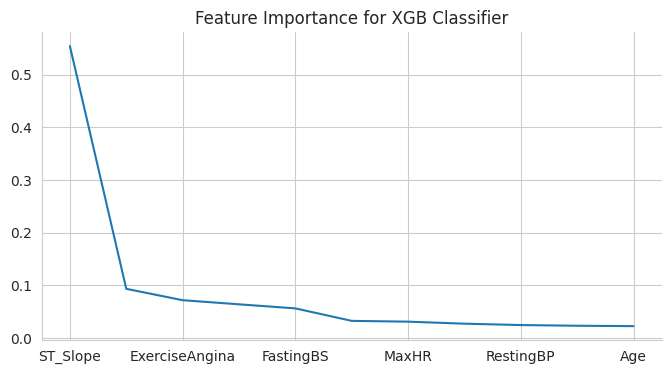

In [ ]:
from matplotlib import pyplot as plt
XGB_feature_imp['Feature Importance'].plot(kind='line', figsize=(8, 4), title='Feature Importance for XGB Classifier')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
operations = [("scaler", MinMaxScaler()), ("xgb", XGBClassifier(random_state=101))]

XGB_pipe_model = Pipeline(steps=operations)
XGB_pipe_model.get_params()
XGB_pipe_model.fit(X_train, y_train)

y_pred = XGB_pipe_model.predict(X_test)
y_train_pred = XGB_pipe_model.predict(X_train)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, random_state=101)
n_scores = cross_val_score(XGB_pipe_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print(f'Accuracy: Results Mean : %{round(n_scores.mean()*100,3)}, Results Standard Deviation : {round(n_scores.std()*100,3)}')

Accuracy: Results Mean : %85.523, Results Standard Deviation : 3.389


**`Feature Extraction`**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.4 MB/s eta 0:00:00


SHAP, a short name for SHapely Additive ExPlanations, is a method used to explain the output of a machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions [5]. SHAP has a rich functionality (methods) by which we can visualize/interpret the output of our models. Below we use the shap.summary_plot() to identify the impact each feature has on the predicted output.

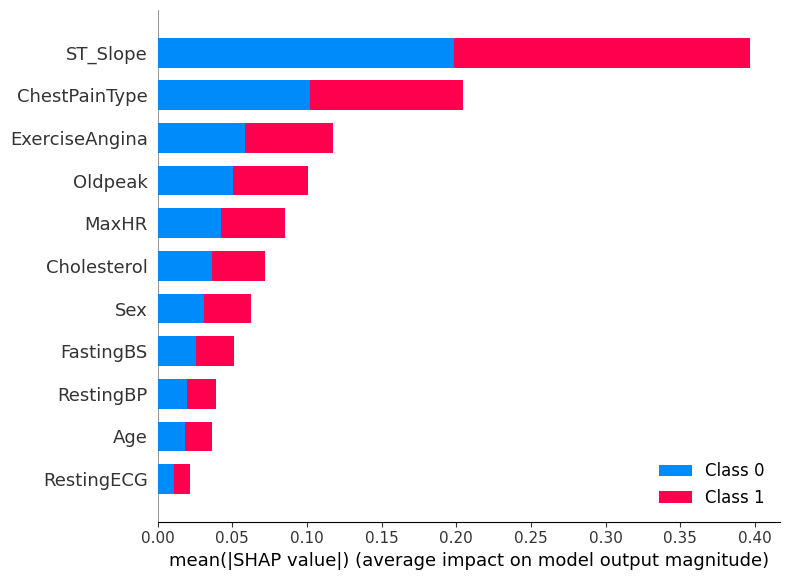

In [ ]:
!pip install shap
import shap
shap.initjs()
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val,
                  feature_names=features,
                  plot_type="bar"
                 )

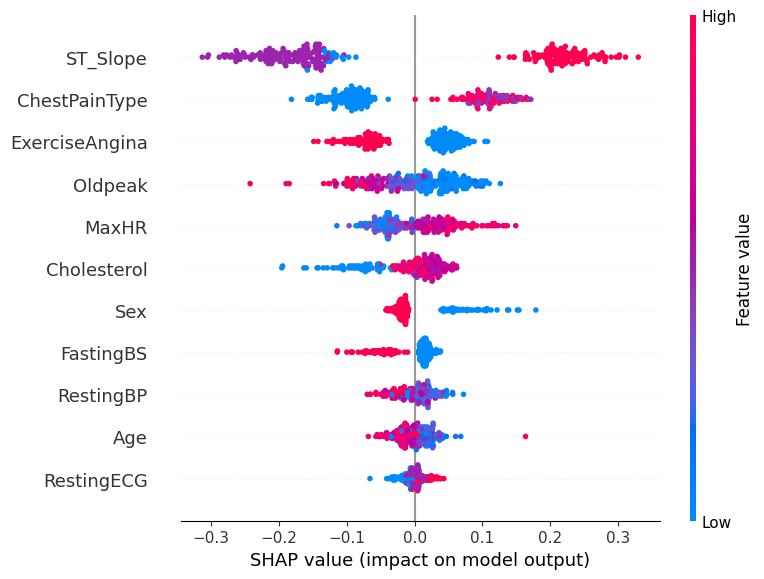

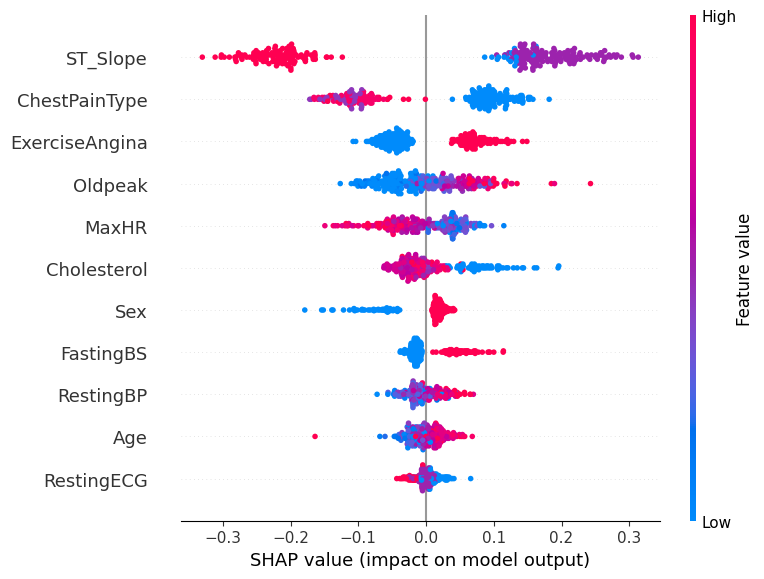

In [ ]:
shap.summary_plot(shap_values[0], X_val)
shap.summary_plot(shap_values[1], X_val)

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=f655ef8f1d7079525f6d315d0fd56a6cb31090b3d288e2f72a67789bbafe1714
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


The permutation importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. The procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature [3]. In other words, permutation importance tell us what features have the biggest impact on our model predictions.

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm_imp = PermutationImportance(gr, random_state=seed).fit(X_train, y_train)
eli5.show_weights(perm_imp, feature_names = X_val.columns.tolist())

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm_imp = PermutationImportance(rf, random_state=seed).fit(X_train, y_train)
eli5.show_weights(perm_imp, feature_names = X_val.columns.tolist())

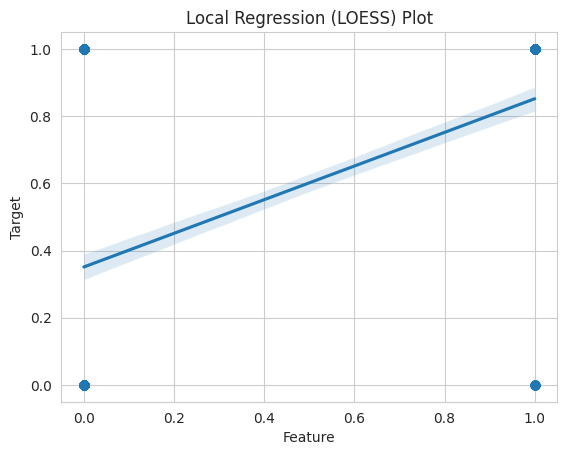

In [ ]:
import seaborn as sns

#Checking for Linearity
sns.regplot(x=df['ExerciseAngina'], y=df['HeartDisease'])
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Local Regression (LOESS) Plot')
plt.show()


In [ ]:
df['ExerciseAngina'].head(5) # It is Linear

0    0
1    0
2    0
3    1
4    0
Name: ExerciseAngina, dtype: int64

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=4238de3beef9c0ef39ed972fcbca6615d40657952d80aa8871266ea2d89360d3
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
#['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
# Import LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=['No','Yes'],
                                                   mode='classification')


# Choose an instance to explain (e.g., the first test instance)
instance_to_explain = X_val.iloc[0]

# Generate an explanation for the instance
explanation = explainer.explain_instance(instance_to_explain.values, rf.predict_proba)

# Visualize the explanation
explanation.show_in_notebook()
# Get the list of tuples
exp_list = explanation.as_list()

# Display the list of tuples
for feature, weight in exp_list:
    print("")
    print(f"Feature: {feature}, Weight: {weight}")

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



Feature: ST_Slope <= 1.00, Weight: 0.3613204636234326

Feature: ChestPainType <= 0.00, Weight: 0.1841144757424466

Feature: ExerciseAngina <= 0.00, Weight: -0.09066250095329365

Feature: -0.40 < Oldpeak <= 0.00, Weight: -0.07653877680551467

Feature: FastingBS > 0.00, Weight: 0.06907143523822304

Feature: Cholesterol <= -0.20, Weight: 0.06037305211677992

Feature: RestingECG <= 1.00, Weight: 0.023484632871572472

Feature: 0.05 < MaxHR <= 0.82, Weight: -0.020561734451157727

Feature: RestingBP <= -0.50, Weight: -0.017738848740709724

Feature: 0.05 < Age <= 0.69, Weight: 0.007765648185167042


NameError: name 'No' is not defined

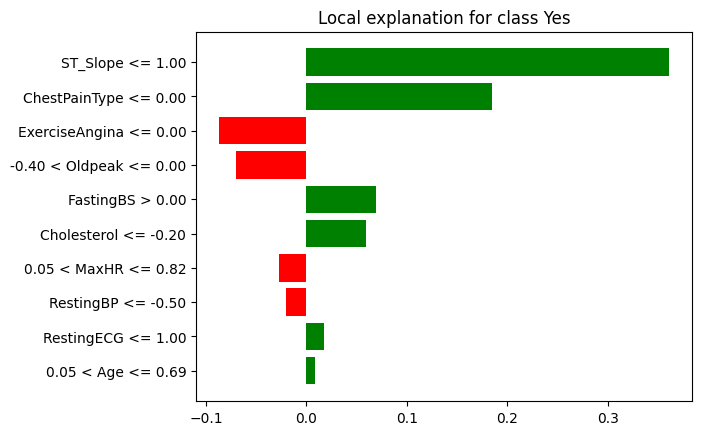

In [ ]:
explanation.as_pyplot_figure(label=1)
explanation.as_pyplot_figure(label= No)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



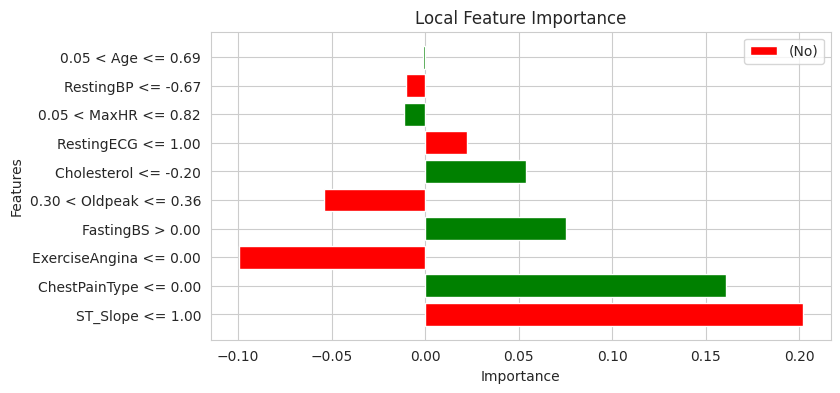

In [ ]:
import matplotlib.pyplot as plt

# ...

# Generate an explanation for the instance
explanation = explainer.explain_instance(instance_to_explain.values, rf.predict_proba)

# Get local feature importance
local_importance = explanation.as_list()

# Define colors for each class
class_colors = ['skyblue', 'salmon']


# Extract feature names and importance values
features, values = zip(*local_importance)

# Plot the local feature importance
plt.figure(figsize=(8, 4))
plt.barh(features, values, color=['Red','green'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Local Feature Importance')
plt.legend(labels=['(No)', '(Yes)'])
plt.show()


In [ ]:
import lime
import lime.lime_tabular
#['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
# Import LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=['No','Yes'],
                                                   mode='classification')


# Choose an instance to explain (e.g., the first test instance)
instance_to_explain = X_val.iloc[0]

# Generate an explanation for the instance
explanation = explainer.explain_instance(instance_to_explain.values, gr.predict_proba)

# Visualize the explanation
explanation.show_in_notebook()

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


The length of each bar indicates the magnitude of importance for the corresponding feature. Longer bars suggest higher importance.
Direction of Importance:

The direction of the bar (left or right) indicates the direction of the impact on the prediction. If the bar extends to the right, it contributes positively to the prediction for the given class; if it extends to the left, it contributes negatively.
Class Labels:

Each group of bars corresponds to a specific class label (e.g., "Class 0" and "Class 1"). Check the legend to identify which color corresponds to each class.
Relative Importance:

Compare the lengths of bars within each class to understand the relative importance of features for that class. Features with longer bars have a more significant impact on the prediction for that class.
Feature Names:

The y-axis lists the features with their names. Features at the top have higher importance. Pay attention to features with longer bars.
Negative and Positive Contributions:

Features with bars extending to the left contribute negatively to the prediction, while those extending to the right contribute positively. Understanding the sign of the contribution is crucial.
Overall Prediction:

Consider the combined impact of all features to understand the overall prediction. Features with positive contributions push the prediction toward the corresponding class, while features with negative contributions pull the prediction away.

In [ ]:
# Import LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns.tolist(),
                                                   class_names=['Class 0', 'Class 1'],
                                                   mode='classification')

# Choose an instance to explain (e.g., the first test instance)
instance_to_explain = X_val.iloc[0]

# Generate an explanation for the instance
explanation = explainer.explain_instance(instance_to_explain.values, rf.predict_proba)

# Visualize the explanation
explanation.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



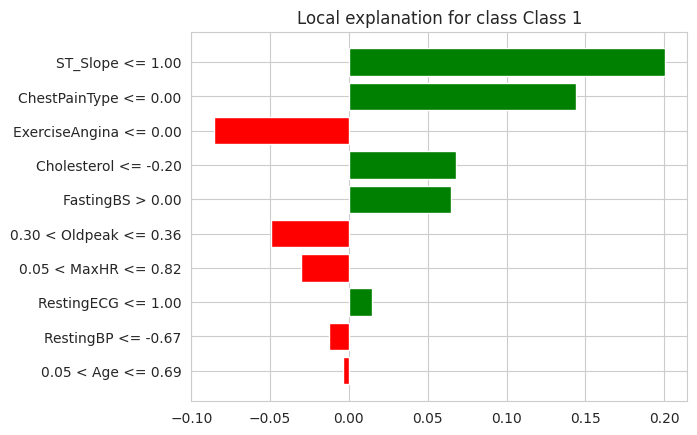

In [ ]:
# Convert the explanation to a matplotlib figure
fig = explanation.as_pyplot_figure()

# Display the figure
plt.show()
fig.legend(labels=['No', 'Yes)'])